In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as smf
import sklearn 
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [9]:
delivery = pd.read_csv("delivery_time.csv")

In [10]:
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [11]:
delivery.shape #for the no of rows and columns

(21, 2)

In [12]:
delivery.info() #for checking the null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [13]:
#for checking the duplicates
delivery[delivery.duplicated(keep=False)] 

,Delivery Time,Sorting Time


In [14]:
#checking for the correlation 
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


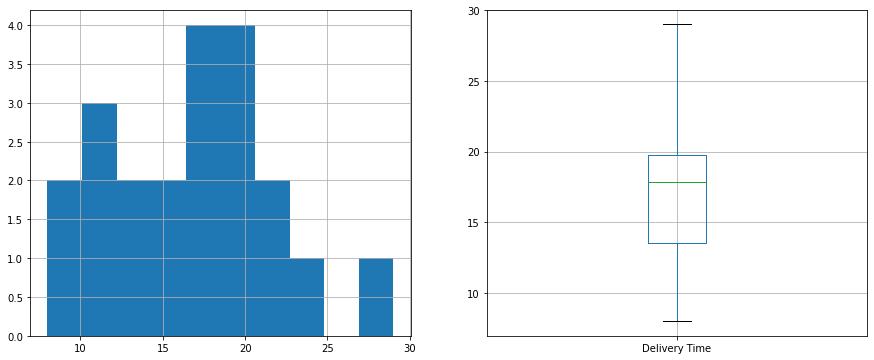

In [15]:
#checking the outlayers for delivery time column
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
delivery["Delivery Time"].hist()
plt.subplot(1,2,2)
delivery.boxplot(column=["Delivery Time"])

plt.show()

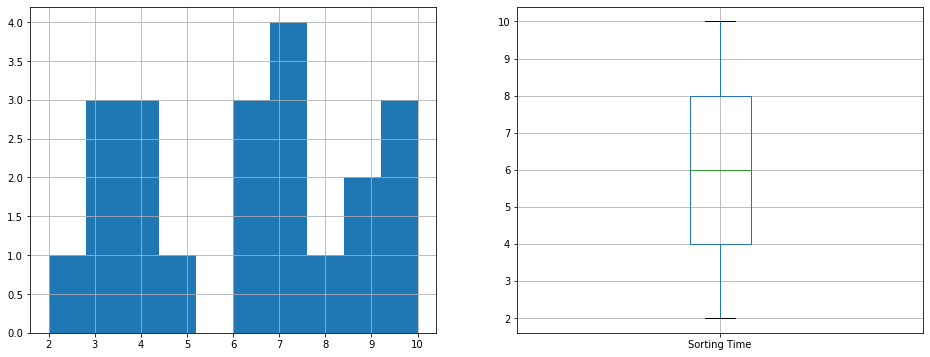

In [16]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
delivery["Sorting Time"].hist()
plt.subplot(1,2,2)
delivery.boxplot(column=["Sorting Time"])
plt.show()

In [17]:
#renaming the column
delivery = delivery.rename({'Delivery Time':'DT','Sorting Time':'ST'},axis=1)

In [18]:
delivery.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


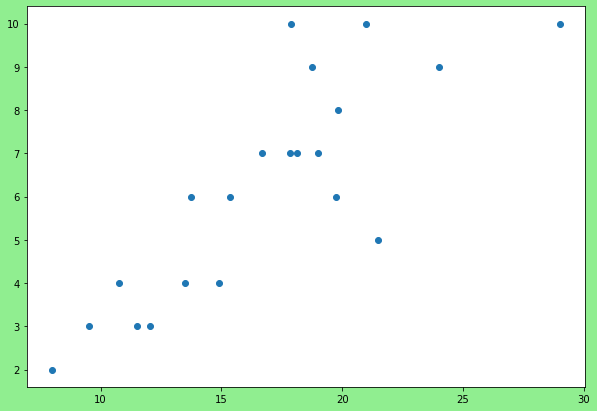

In [19]:
#scatter plot
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(delivery.DT,delivery.ST)

In [20]:
#predicting the model without appying the model
model1 = smf.ols('DT~ST',data = delivery).fit()


In [25]:
model1.params

Intercept    6.582734
ST           1.649020
dtype: float64

<AxesSubplot:xlabel='ST', ylabel='DT'>

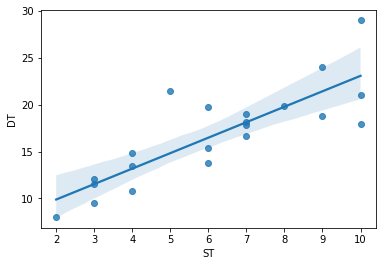

In [21]:
sns.regplot(x="ST",y="DT",data=delivery)

In [22]:
#creating the model using the SKLEARN algorithm

In [23]:
delivery.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [50]:
lm = LinearRegression()

X=delivery["DT"].values.reshape(-1,1)
Y=delivery["ST"].values.reshape(-1,1)

reg_sklearn = lm.fit(X,Y)

In [51]:
delivery["DT"]

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: DT, dtype: float64

In [54]:
#finding the alpha and beta values
print(reg_sklearn.intercept_,"beta value")  #beta
print(reg_sklearn.coef_,"alpha value") #alpha

[-0.75667337] beta value
[[0.41374363]] alpha value


In [57]:
model1.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [60]:
reg_sklearn.predict(X)

array([[ 7.93194282],
       [ 4.82886561],
       [ 7.41476329],
       [ 9.17317371],
       [11.24189185],
       [ 5.59429132],
       [ 7.10445557],
       [ 3.1738911 ],
       [ 6.64933758],
       [ 7.00101966],
       [ 7.44786278],
       [ 3.69107064],
       [ 6.14457035],
       [ 4.00137836],
       [ 4.22066248],
       [ 5.39983182],
       [ 4.93230152],
       [ 6.73622374],
       [ 2.55327566],
       [ 6.62037552],
       [ 8.13881464]])

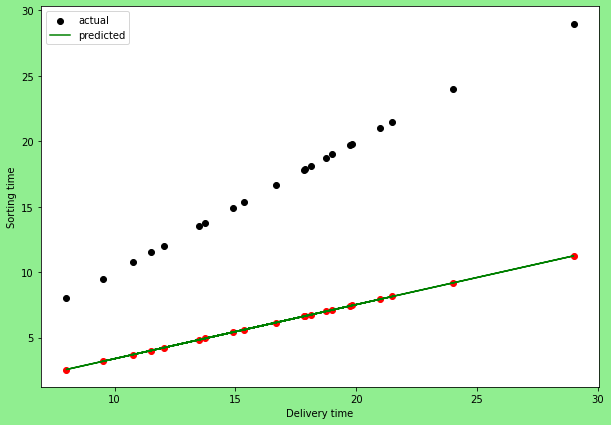

In [58]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(delivery.DT,(delivery.DT),color="black",label="actual")
plt.plot(delivery.DT,reg_sklearn.predict(X),label="predicted",color="green",linestyle="-")
plt.scatter(delivery.DT,reg_sklearn.predict(X),color="red")
plt.xlabel("Delivery time")
plt.ylabel("Sorting time")
plt.legend(loc="best")

plt.show()

In [59]:
#model validation 
pred_del_time= reg_sklearn.predict(X)
r2_score(delivery["DT"],pred_del_time)

-3.924956307673006

In [61]:
#creating the model by using the statsmodels

In [62]:
delivery.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [64]:
first_model = smf.ols("DT~ST",data=delivery).fit()
#pred_statsmodel = first_model.predict(delivery["DT"])
#r2_score(delivery["DT"],pred_train_lm)

In [65]:
first_model

In [66]:
first_model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [68]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           3.98e-06
Time:                        00:01:15   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

here by using the stats model created the model by using only the DT column  and the r**2 value obtaind is 0.682 and which is not preferable 

In [69]:
# again creating the model by applying the logerathmic function


In [70]:
second_model = smf.ols('DT~np.log(ST)',data=delivery).fit()
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           2.64e-06
Time:                        00:15:50   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

the R**2 value got here is 0.695 which is not preferable 

In [ ]:
#again creating the model by using the exponential fumction

In [71]:
third_model = smf.ols('DT~np.exp(ST)',data=delivery).fit()
third_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Thu, 09 Jun 2022   Prob (F-statistic):            0.00396
Time:                        00:21:40   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0836      1.047     14.406      0.000      12.892      17.275
np.exp(ST)     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

here in this model the r**2 value is not good 

In [72]:
#creating the fourth model by using applying the log functin to the DT 

In [73]:
fourth_model = smf.ols('np.log(DT)~ST',data=delivery).fit()
fourth_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           1.59e-06
Time:                        00:26:04   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
ST             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

here in this model the r**2 value is 0.711 and which is nearer to 1 and the p_value is also zero compared to other models the r**2 value is more in this model 

# Hence the fourth model is the good model to predict delivery time